# Regresión Logística vs Árbol de decisión


In [43]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [44]:
from pathlib import Path
# Esta es otra forma de crear directorios 
# IMAGES_PATH es un objeto que permite hacer llamadas al sistema
# como por ejemplo, crear un directorio
IMAGES_PATH = Path() / "images" / "classificacion_trees"
# parents: crear directorios superiores o no
# exist_ok: qué pasa si ya existe
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [46]:
import pandas as pd
penguins = pd.read_csv("data/penguins_pre.csv")

In [47]:
penguins.drop(columns=["Dream", "Biscoe", "Torgersen"], inplace=True)

In [48]:
X = penguins.drop(["target"], axis=1)
y = penguins["target"]


In [49]:
# Hacer una función con todo y probar diversos arboles StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [50]:
# Entrenar regresión logistica
lr = LogisticRegression(max_iter=10000, tol=0.001, random_state=42)

In [51]:
# Interpretar coeficientes
lr.fit(train_set, train_y_set)

LogisticRegression(max_iter=10000, random_state=42, tol=0.001)

In [52]:
lr.coef_

array([[-5.96418129e-01,  1.05984867e+00,  4.86276370e-02,
        -4.42913179e-04, -1.39505735e-01,  2.02627921e-01],
       [ 2.97017528e-01,  1.26573848e-01, -4.51260999e-02,
        -1.47578282e-03,  1.57261500e-01, -1.83288691e-01],
       [ 2.99400601e-01, -1.18642252e+00, -3.50153713e-03,
         1.91869600e-03, -1.77557656e-02, -1.93392299e-02]])

In [53]:
lr.intercept_

array([ 0.07181094, -0.02820726, -0.04360368])

In [54]:
# Predecir el primer elemento del test y comprobar que es correcto
lr.predict(test_set[:1])


array([1.])

In [55]:
test_y_set[:1]

165    1.0
Name: target, dtype: float64

In [56]:
# método predict vs predict_proba
lr.predict_proba(test_set[:1])

array([[0.01623614, 0.63025979, 0.35350408]])

In [59]:
# Entrenar modelo
tree_cls = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)

In [60]:
tree_cls.fit(train_set, train_y_set)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)

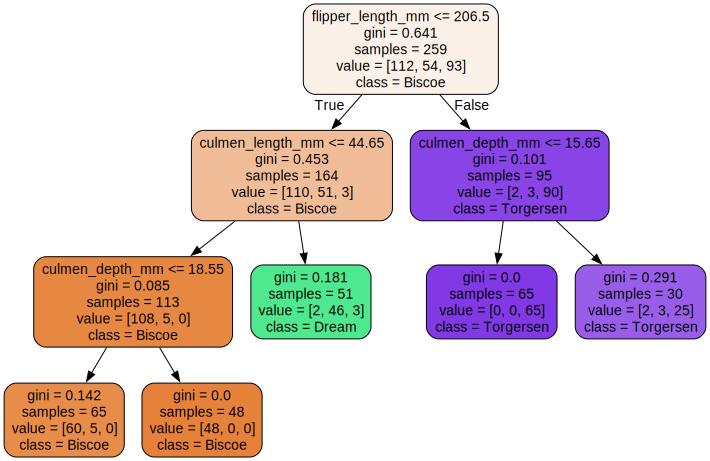

In [61]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_cls,
    out_file=str(IMAGES_PATH / "classificacion_tree.dot"),
    feature_names=train_set.columns,
    class_names = [ "Biscoe","Dream", "Torgersen"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "classificacion_tree.dot")

In [ ]:
# Interpretar gráfico


In [63]:
# Hacer una predicción del primer elemento del test y comprobar
tree_cls.predict(test_set[:1])

array([1.])

In [64]:
test_y_set[:1]

165    1.0
Name: target, dtype: float64

In [65]:
# método predict vs predict_proba
tree_cls.predict_proba(test_set[:1])

array([[0.03921569, 0.90196078, 0.05882353]])

In [66]:
tree_cls.predict_log_proba(test_set[:1])

array([[-3.23867845, -0.10318424, -2.83321334]])

In [68]:
# Comparar el error train y test
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report, accuracy_score, precision_score
accuracy_score(train_y_set, tree_cls.predict(train_set))

0.9420849420849421

In [70]:
accuracy_score(test_y_set, tree_cls.predict(test_set))

0.8615384615384616

In [72]:
multilabel_confusion_matrix(train_y_set, tree_cls.predict(train_set))

array([[[142,   5],
        [  4, 108]],

       [[200,   5],
        [  8,  46]],

       [[161,   5],
        [  3,  90]]], dtype=int64)

In [73]:
multilabel_confusion_matrix(test_y_set, tree_cls.predict(test_set))

array([[[30,  7],
        [ 1, 27]],

       [[49,  2],
        [ 6,  8]],

       [[42,  0],
        [ 2, 21]]], dtype=int64)

In [74]:
classification_report(test_y_set, tree_cls.predict(test_set))

'              precision    recall  f1-score   support\n\n         0.0       0.79      0.96      0.87        28\n         1.0       0.80      0.57      0.67        14\n         2.0       1.00      0.91      0.95        23\n\n    accuracy                           0.86        65\n   macro avg       0.86      0.82      0.83        65\nweighted avg       0.87      0.86      0.86        65\n'

In [75]:
classification_report(train_y_set, tree_cls.predict(train_set))

'              precision    recall  f1-score   support\n\n         0.0       0.96      0.96      0.96       112\n         1.0       0.90      0.85      0.88        54\n         2.0       0.95      0.97      0.96        93\n\n    accuracy                           0.94       259\n   macro avg       0.94      0.93      0.93       259\nweighted avg       0.94      0.94      0.94       259\n'

In [ ]:
# ¿Qué pasa si cambiamos la semilla/orden de los datos en cada modelo?

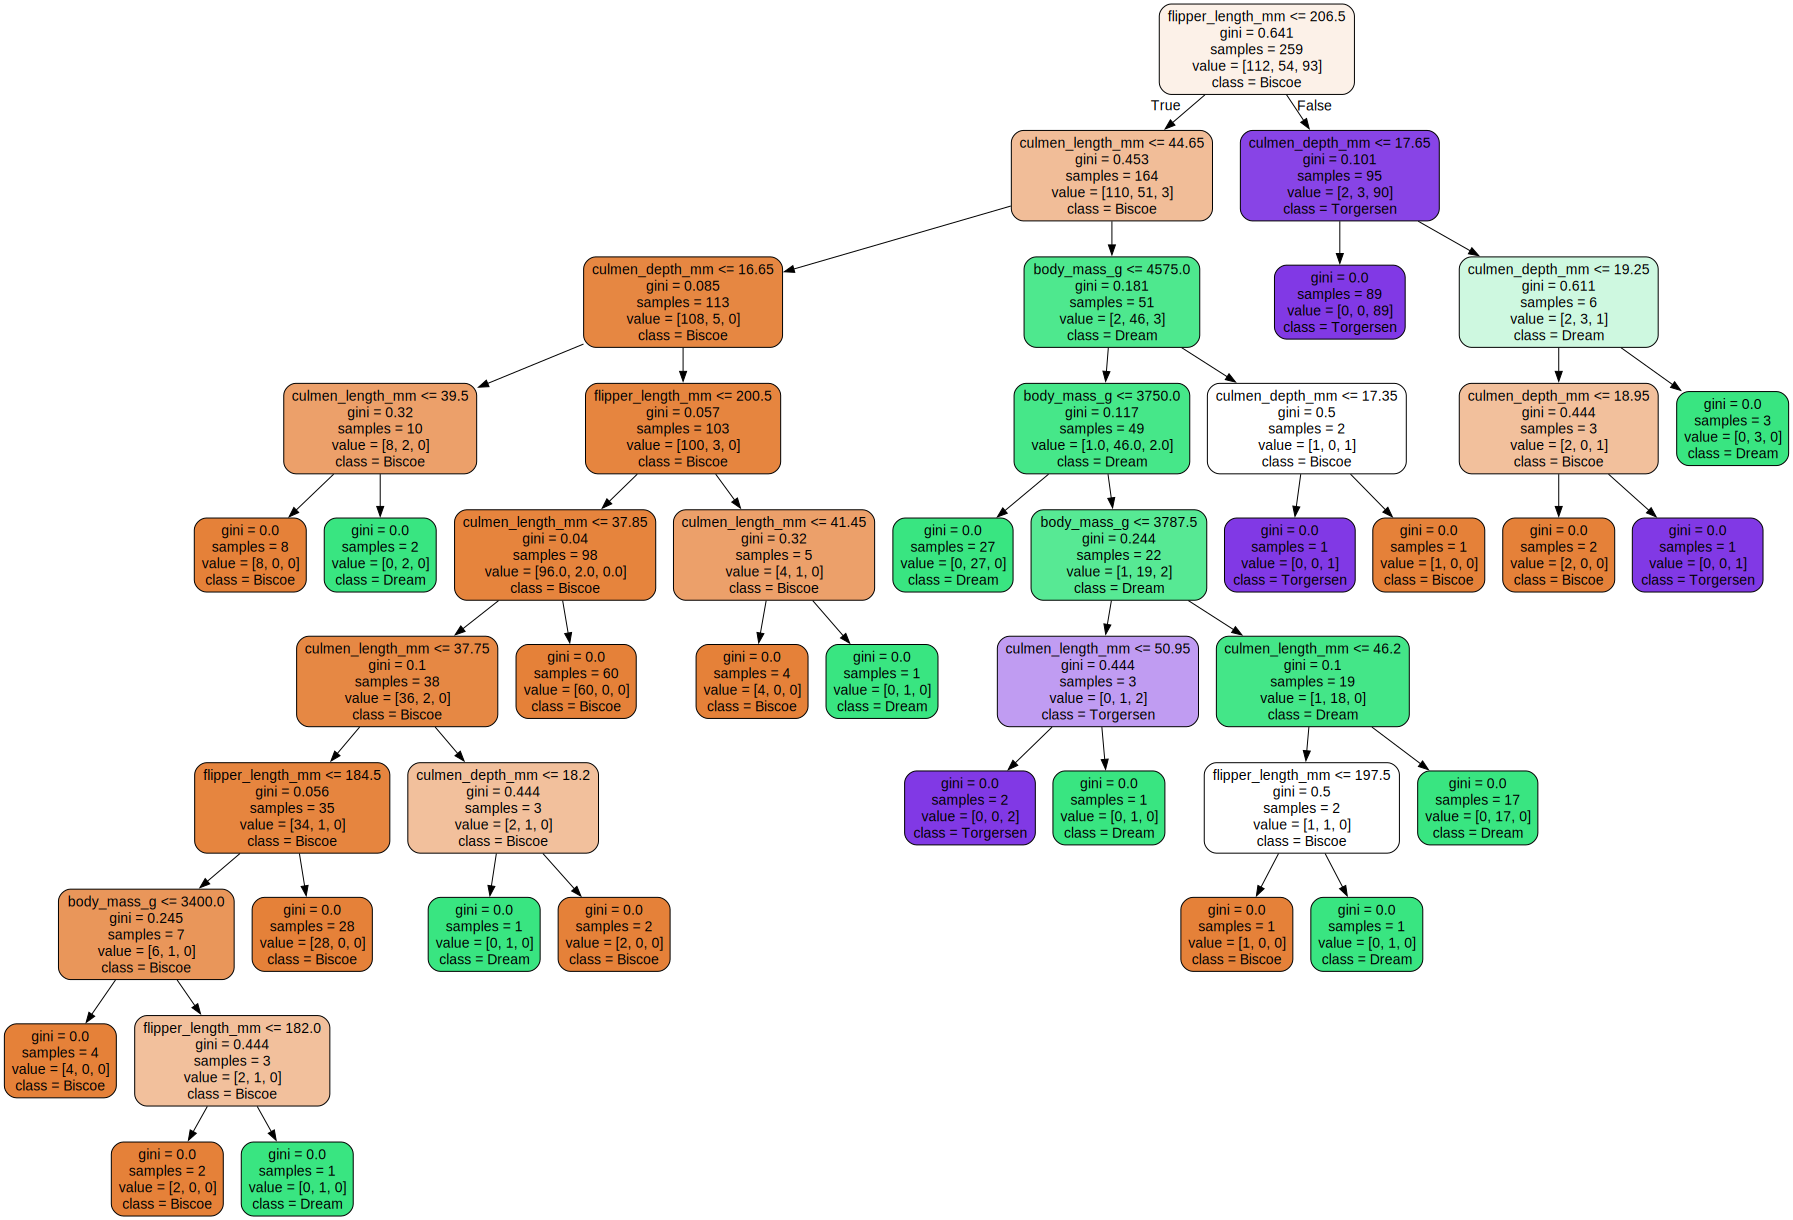

In [77]:
# Comprueba el árbol de decisión sin ningún hiperparámetro
tree_clsg = DecisionTreeClassifier()
tree_clsg.fit(train_set, train_y_set)
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_clsg,
    out_file=str(IMAGES_PATH / "classificacion_tree.dot"),
    feature_names=train_set.columns,
    class_names = [ "Biscoe","Dream", "Torgersen"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "classificacion_tree.dot")